In [1]:
#Load necessary Libraries
import pandas as pd
import numpy as np
import pickle

In [2]:
# Load dataset
df = pickle.load(open("speech_manmohan_docvectors.pickle", 'rb'))
df

,index,Date,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,...,dim_291,dim_292,dim_293,dim_294,dim_295,dim_296,dim_297,dim_298,dim_299,dim_300
0,MSS1,2004-06-24,-0.404733,0.242277,-1.601294,0.447196,-0.257316,0.176029,-0.273649,0.438772,...,-0.208014,0.766726,-0.314918,0.042952,0.291328,0.830099,0.536898,0.046423,0.204305,-0.576565
1,MSS2,2004-06-29,0.573737,-0.480320,1.743196,1.174080,0.126815,0.654524,0.341711,-0.141792,...,-0.630016,0.748618,0.794176,-0.850939,-0.516141,-0.282361,-0.016092,-0.202879,0.853287,0.869919
2,MSS3,2004-07-03,0.794210,-0.160598,-0.199399,-0.034168,-0.864881,0.590998,-0.541213,-1.192452,...,-0.024232,0.092392,-0.036630,0.552930,0.723467,-0.144119,0.276267,-0.363168,0.264049,-0.811601
3,MSS4,2004-07-26,-1.185630,-0.451720,0.730700,-1.863737,-0.537194,-0.009555,-0.349590,-1.016569,...,-0.445051,0.636429,-0.231073,-0.739165,0.004606,0.101162,1.028553,0.339506,1.867010,-0.407444
4,MSS5,2004-07-31,0.656586,0.308466,-0.582591,-0.518338,0.288080,-0.051357,-0.040363,-0.036358,...,0.415924,0.327185,-0.342873,0.039921,-0.227697,-0.025413,-0.011922,-0.511536,0.578780,-0.867072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,MSS1397,2014-02-21,-0.527938,-0.500793,-0.269800,-0.318535,-0.115542,0.854289,-0.001319,-0.311093,...,0.212694,0.483530,0.038847,-0.105307,-0.116772,0.721731,-0.146309,0.044501,0.560784,0.256112
1397,MSS1398,2014-02-26,0.073212,0.071683,-0.183084,0.669091,0.123083,-0.870685,-0.027076,1.063034,...,-0.811804,0.204701,-0.162834,0.051269,0.724884,0.769421,0.422297,0.075149,-0.248065,-0.448471
1398,MSS1399,2014-03-01,0.276246,-0.726484,-0.597691,-0.144574,-0.056699,-0.120744,-0.748406,0.501323,...,-0.763715,0.483311,0.107261,0.544801,-0.689219,0.150203,-0.206411,0.061585,-0.614615,-1.439822
1399,MSS1400,2014-03-04,0.588028,1.582659,-0.794429,2.023808,-0.887529,0.920263,-0.189089,0.959593,...,-0.854925,0.220066,1.319079,-0.060265,0.417895,-0.203450,-0.639839,-0.798395,0.805784,-1.690870


## Objective: To cluster the data using UMAPS
1. Use UMAPS to reduce the dimensionality of the data to 2 dimensions
2. Cluster the data
3. Embed Date information into the data
4. Plot the data giving each year a different color

In [6]:
%pip install umap

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3551 sha256=6551ab50e7047a0509396f2a373eb420e7702af61c094c5211667fdc13028c31
  Stored in directory: c:\users\yatika arora\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local\pip\cache\wheels\82\d8\73\e9eb3334baaad795ff0278363ff1aca7568bdf2793e452a527
Successfully built umap
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\Yatika Arora\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [10]:
%pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


In [9]:
%pip install --upgrade pip

     ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
      --------------------------------------- 0.0/2.1 MB 1.4 MB/s eta 0:00:02
     -- ------------------------------------- 0.1/2.1 MB 1.3 MB/s eta 0:00:02
     -- ------------------------------------- 0.1/2.1 MB 1.2 MB/s eta 0:00:02
     --- ------------------------------------ 0.2/2.1 MB 1.1 MB/s eta 0:00:02
     --- ------------------------------------ 0.2/2.1 MB 1.1 MB/s eta 0:00:02
     ---- ----------------------------------- 0.2/2.1 MB 1.0 MB/s eta 0:00:02
     ---- ----------------------------------- 0.3/2.1 MB 927.4 kB/s eta 0:00:02
     ----- ---------------------------------- 0.3/2.1 MB 905.4 kB/s eta 0:00:02
     ------ --------------------------------- 0.3/2.1 MB 846.5 kB/s eta 0:00:03
     ------ --------------------------------- 0.3/2.1 MB 846.5 kB/s eta 0:00:03
     ------- -------------------------------- 0.4/2.1 MB 791.2 kB/s eta 0:00:03
     ---------- ----------------------------- 0.5/2.1 MB 1.0 

In [3]:
%pip install --upgrade umap-learn


                                              0.0/88.2 kB ? eta -:--:--
     ---------------------------              61.4/88.2 kB 1.1 MB/s eta 0:00:01
     ---------------------------------------- 88.2/88.2 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
                                              0.0/2.6 MB ? eta -:--:--
     ---                                      0.2/2.6 MB 6.3 MB/s eta 0:00:01
     ---                                      0.2/2.6 MB 3.0 MB/s eta 0:00:01
     --------                                 0.5/2.6 MB 4.2 MB/s eta 0:00:01
     -------------                            0.8/2.6 MB 5.3 MB/s eta 0:00:01
     ------------------                       1.2/2.6 MB 5.9 MB/s eta 0:00:01
     ----------------------                   1.4/2.6 MB 6.0 MB/s eta 0:00:01
     -------------------------                1.6/2.6 MB 5.5 MB/s eta 0:00:01
     ------------------------------           1.9

In [6]:
from umap import UMAP

C:\Users\Yatika Arora\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\Yatika Arora\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.h

### Dimensionality Reduction | UMAPS
Data Preprocessing:
1. Remove the columns that are not needed -- index, Date, speech_number

In [4]:
# Remove columns 0, 1, and 2 to create only dimension columns matrix
df_dim = df.drop(['index', 'Date'], axis=1)
df_dim


,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,dim_10,...,dim_291,dim_292,dim_293,dim_294,dim_295,dim_296,dim_297,dim_298,dim_299,dim_300
0,-0.404733,0.242277,-1.601294,0.447196,-0.257316,0.176029,-0.273649,0.438772,0.154940,0.109133,...,-0.208014,0.766726,-0.314918,0.042952,0.291328,0.830099,0.536898,0.046423,0.204305,-0.576565
1,0.573737,-0.480320,1.743196,1.174080,0.126815,0.654524,0.341711,-0.141792,-0.618140,-0.287241,...,-0.630016,0.748618,0.794176,-0.850939,-0.516141,-0.282361,-0.016092,-0.202879,0.853287,0.869919
2,0.794210,-0.160598,-0.199399,-0.034168,-0.864881,0.590998,-0.541213,-1.192452,-0.520035,0.000089,...,-0.024232,0.092392,-0.036630,0.552930,0.723467,-0.144119,0.276267,-0.363168,0.264049,-0.811601
3,-1.185630,-0.451720,0.730700,-1.863737,-0.537194,-0.009555,-0.349590,-1.016569,-0.029206,-1.068703,...,-0.445051,0.636429,-0.231073,-0.739165,0.004606,0.101162,1.028553,0.339506,1.867010,-0.407444
4,0.656586,0.308466,-0.582591,-0.518338,0.288080,-0.051357,-0.040363,-0.036358,0.188992,-0.591589,...,0.415924,0.327185,-0.342873,0.039921,-0.227697,-0.025413,-0.011922,-0.511536,0.578780,-0.867072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,-0.527938,-0.500793,-0.269800,-0.318535,-0.115542,0.854289,-0.001319,-0.311093,0.012192,0.165311,...,0.212694,0.483530,0.038847,-0.105307,-0.116772,0.721731,-0.146309,0.044501,0.560784,0.256112
1397,0.073212,0.071683,-0.183084,0.669091,0.123083,-0.870685,-0.027076,1.063034,-1.080665,0.408793,...,-0.811804,0.204701,-0.162834,0.051269,0.724884,0.769421,0.422297,0.075149,-0.248065,-0.448471
1398,0.276246,-0.726484,-0.597691,-0.144574,-0.056699,-0.120744,-0.748406,0.501323,-0.421060,-0.296243,...,-0.763715,0.483311,0.107261,0.544801,-0.689219,0.150203,-0.206411,0.061585,-0.614615,-1.439822
1399,0.588028,1.582659,-0.794429,2.023808,-0.887529,0.920263,-0.189089,0.959593,-0.555012,-0.117551,...,-0.854925,0.220066,1.319079,-0.060265,0.417895,-0.203450,-0.639839,-0.798395,0.805784,-1.690870


In [7]:
# Load the UMAP model
umap = UMAP(n_components=2, random_state=42)

#ABOUT THE MODEL
# n_components parameter set to 2 to reduce the above dimensionality to 2 in order to get a 2-D plot.
# the random_state parameter allows you to control the randomness in code and ensure reproducibility to facilitate comparision


In [8]:
umap_data = umap.fit_transform(df_dim)


In [9]:
# create a new dataframe and Apply the UMAP model to the dimension columns matrix
df_umap = pd.DataFrame(umap_data, columns=['x', 'y'])
df_umap

,x,y
0,-3.758261,4.780322
1,-3.111801,4.349028
2,-2.436061,4.836858
3,-1.609299,4.656673
4,-1.608218,7.811965
...,...,...
1396,-4.304645,3.630582
1397,-2.686887,2.967722
1398,-2.486361,4.368184
1399,-2.294772,7.957796


In [10]:
# Plot the UMAP model
import matplotlib.pyplot as plt

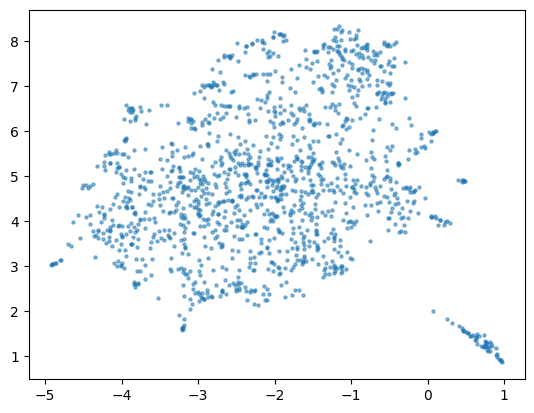

In [11]:
# Plot the UMAP model
plt.scatter(df_umap['x'], df_umap['y'], s=5, alpha=0.5)
plt.show()

In [12]:
# Embed the date column into the UMAP model, create a new dataframe
df_dim_date = pd.concat([df_umap, df['Date']], axis=1)
# Only keep the year in the date column, date is in string, in lambda function, convert it to datetime, and then extract the year
df_dim_date['Date'] = df_dim_date['Date'].apply(lambda x: pd.to_datetime(x).year)

In [13]:
df_dim_date

,x,y,Date
0,-3.758261,4.780322,2004
1,-3.111801,4.349028,2004
2,-2.436061,4.836858,2004
3,-1.609299,4.656673,2004
4,-1.608218,7.811965,2004
...,...,...,...
1396,-4.304645,3.630582,2014
1397,-2.686887,2.967722,2014
1398,-2.486361,4.368184,2014
1399,-2.294772,7.957796,2014


In [14]:
# Delete the entry with year nan
df_dim_date = df_dim_date[df_dim_date['Date'] != 'nan']

In [15]:
# Print unique years
df_dim_date['Date'].unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014],
      dtype=int64)

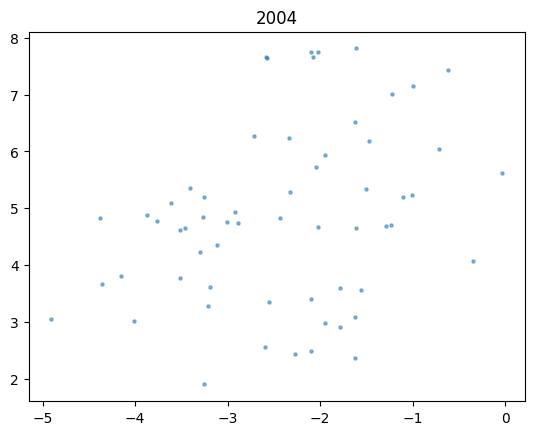

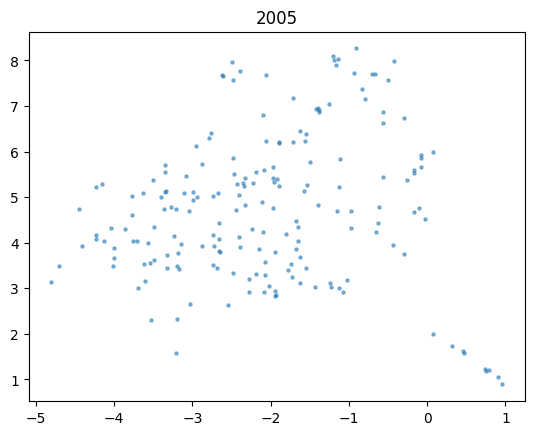

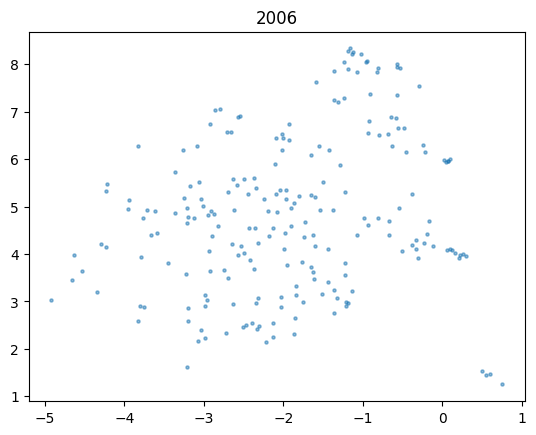

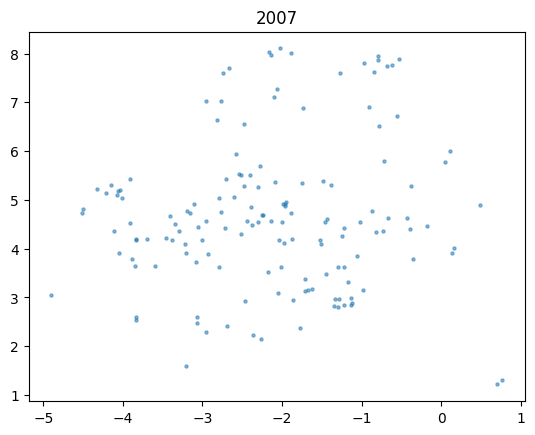

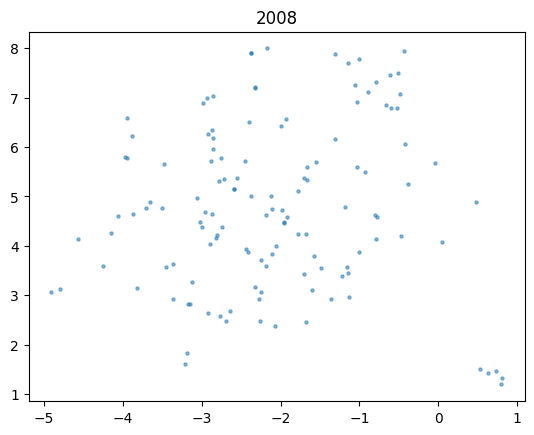

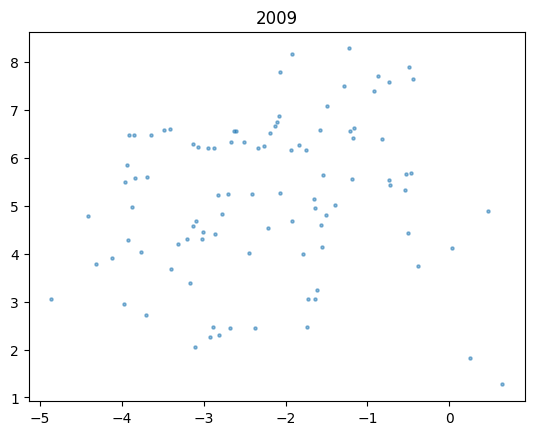

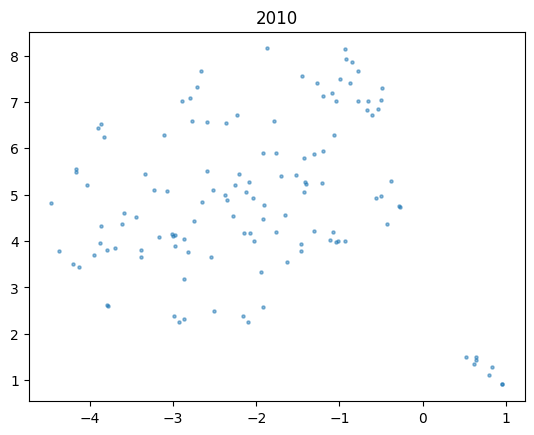

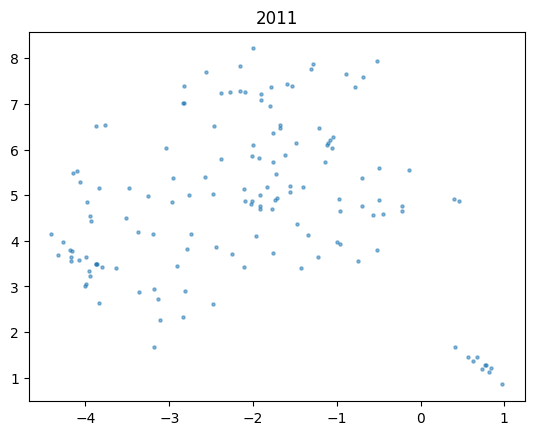

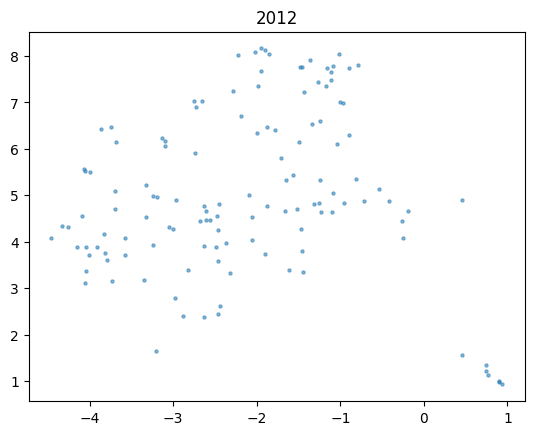

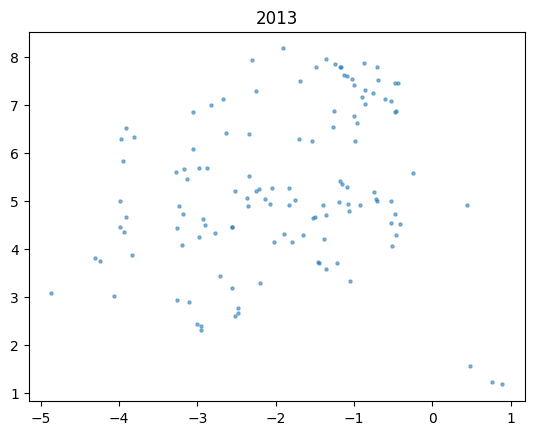

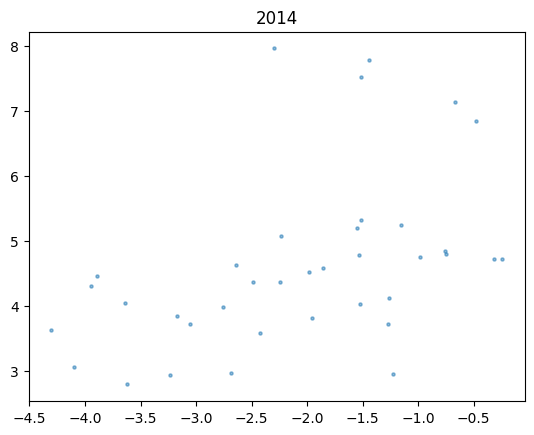

In [16]:
# Plot the UMAP model sub graphs. In each graph, only keep the data of one year and rest paint it as gray
for year in df_dim_date['Date'].unique():
    plt.scatter(df_dim_date[df_dim_date['Date'] == year]['x'],
                df_dim_date[df_dim_date['Date'] == year]['y'],
                s=5, alpha=0.5)
    plt.title(year)
    plt.show()

### Clustering
1. Use KMeans to cluster the data

In [17]:
# import the KMeans model
from sklearn.cluster import KMeans

In [18]:
df_umap.head()

,x,y
0,-3.758261,4.780322
1,-3.111801,4.349028
2,-2.436061,4.836858
3,-1.609299,4.656673
4,-1.608218,7.811965


In [19]:
# Unique years
df_dim_date['Date'].unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014],
      dtype=int64)

We idealy want clusters for each year.
We will use the elbow method to determine the number of clusters
Elbow method is a method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset. It is a heuristic method to estimate the optimal number of clusters in a data set given by the sum of squared errors (SSE) within clusters.

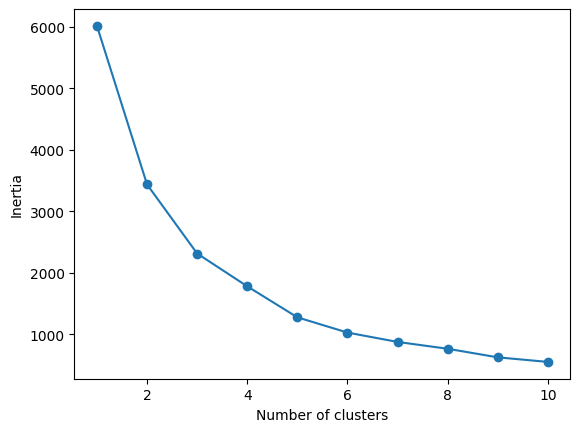

In [20]:
# Find the optimal number of clusters in df_umap using the elbow method
# Create a list of inertia values
inertia = []
for i in range(1, 11):
    # Create a KMeans instance with i clusters: model
    model = KMeans(n_clusters=i, random_state=42, n_init='auto')

    # Fit model to samples
    model.fit(df_umap)

    # Append the inertia to the list of inertia
    inertia.append(model.inertia_)

# Plot the inertia vs number of clusters
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


Here a decrease in the SSE is observed as the number of clusters increases. The point where the SSE curve starts to bend is considered as the optimal number of clusters. 
In the plot below, the elbow is at k=4 indicating the optimal k for this dataset is 4.

In [21]:
# Create a KMeans instance with 4 clusters: model
model = KMeans(n_clusters=4, random_state=42, n_init='auto')
# Fit model to df_umap
model.fit(df_umap)

KMeans(n_clusters=4, n_init='auto', random_state=42)

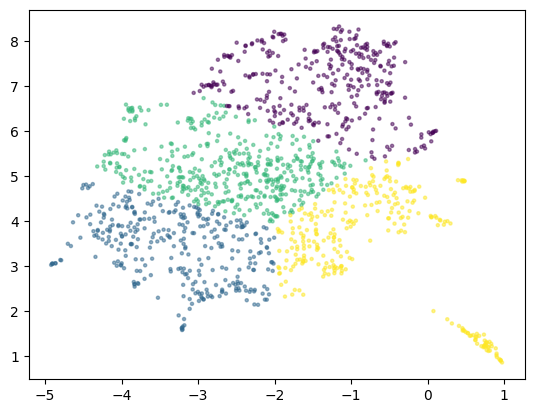

In [22]:
# Plot the clusters
plt.scatter(df_umap['x'], df_umap['y'], c=model.labels_, s=5, alpha=0.5)

In [23]:
# Append the cluster label to the dataframe of df_dim_date
df_dim_date['cluster'] = model.labels_
df_dim_date

,x,y,Date,cluster
0,-3.758261,4.780322,2004,2
1,-3.111801,4.349028,2004,1
2,-2.436061,4.836858,2004,2
3,-1.609299,4.656673,2004,2
4,-1.608218,7.811965,2004,0
...,...,...,...,...
1396,-4.304645,3.630582,2014,1
1397,-2.686887,2.967722,2014,1
1398,-2.486361,4.368184,2014,2
1399,-2.294772,7.957796,2014,0


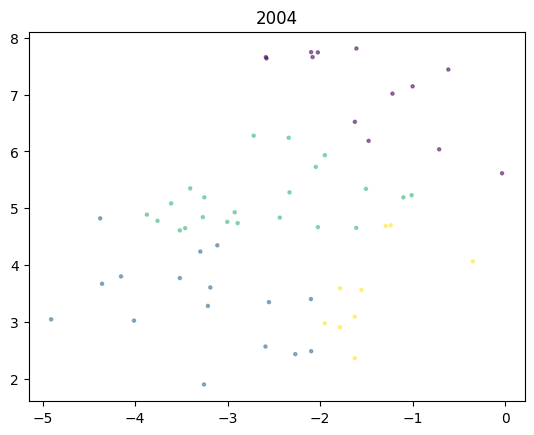

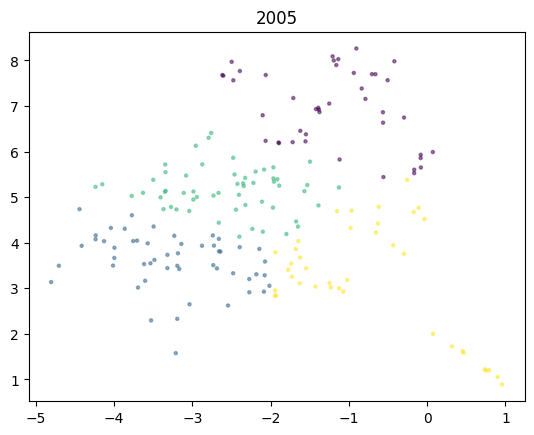

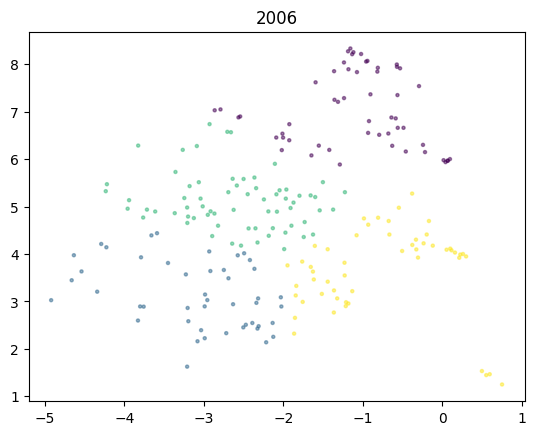

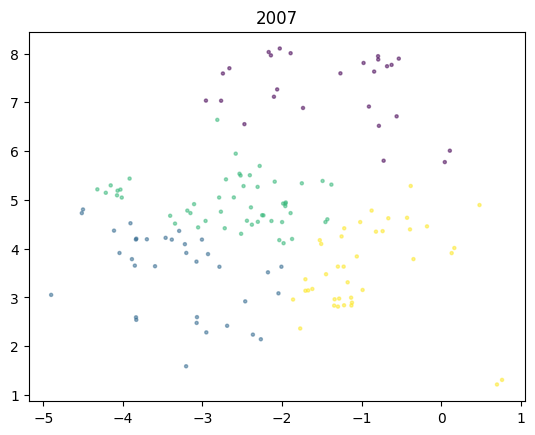

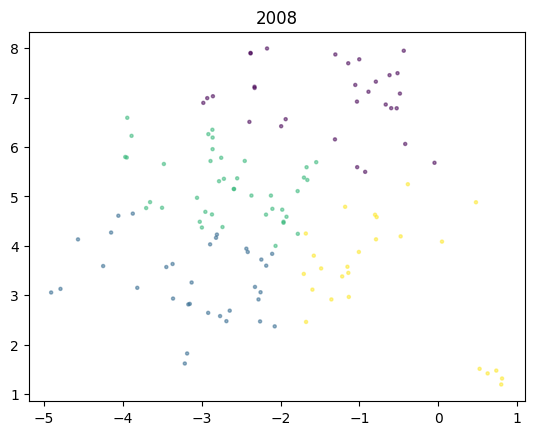

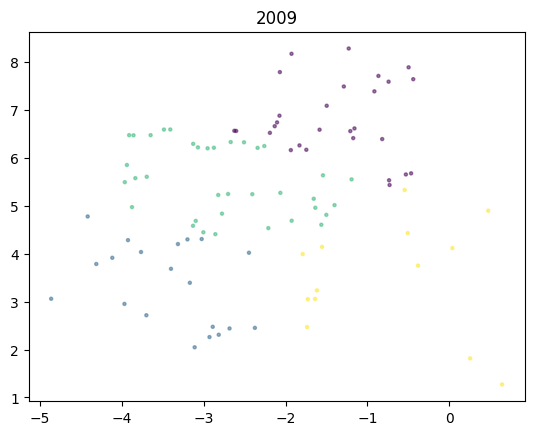

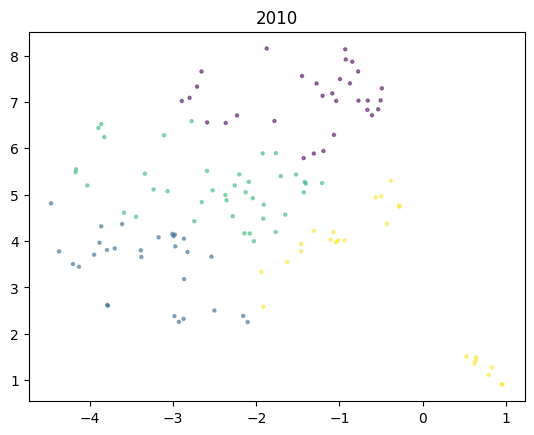

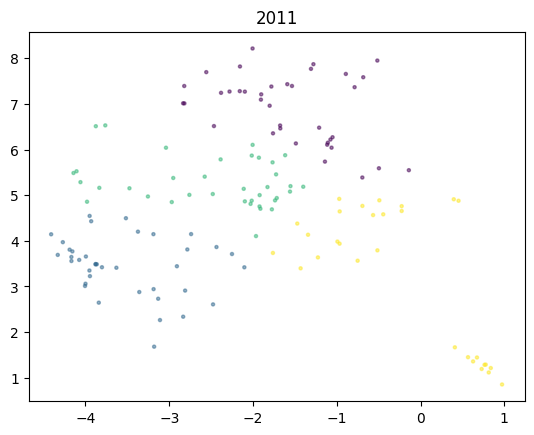

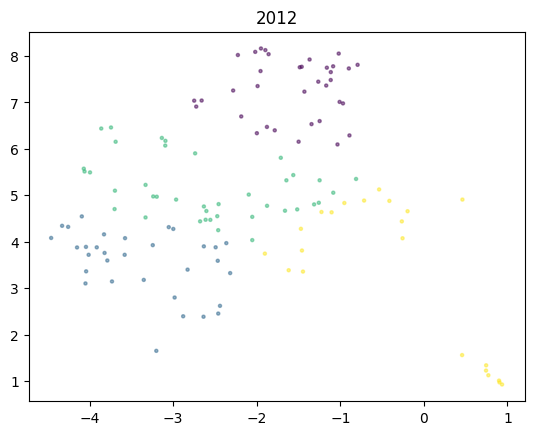

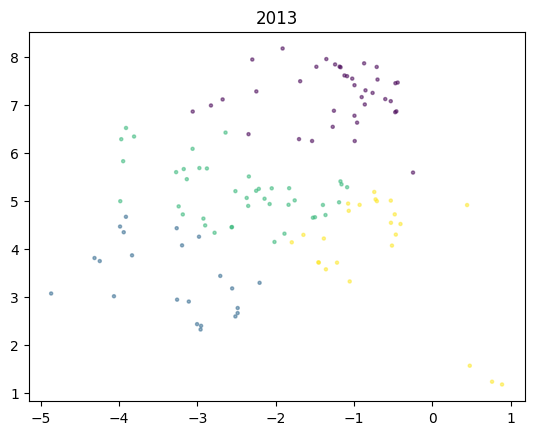

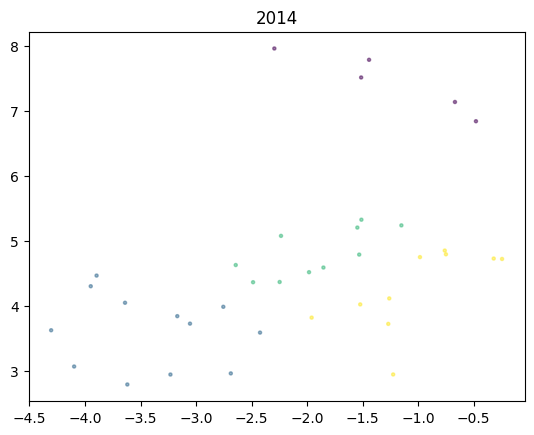

In [24]:
# Plot the clusters sub graphs. In each graph, only keep the data of one year and rest paint it as gray
for year in df_dim_date['Date'].unique():
    plt.scatter(df_dim_date[df_dim_date['Date'] == year]['x'],
                df_dim_date[df_dim_date['Date'] == year]['y'],
                c=df_dim_date[df_dim_date['Date'] == year]['cluster'],
                s=5, alpha=0.5)
    plt.title(year)
    plt.show()
    

In above, we can clearly see that all clusters are more or less equally spreaded over the years.